# Assignment 1: Data Preparation and Exploration (EDA)
## Customer Churn Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Task 1.1: Load and Display Dataset Structure

In [4]:
df = pd.read_csv("data/customer_churn.csv")

print("-" * 50)
print("DATASET STRUCTURE")
print("-" * 50)
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

print("\n\nData types and Info:")
df.info()

print("\n\nColumn names and types:")
for col in df.columns:
    print(f"  {col}: {df[col].dtype}")

--------------------------------------------------
DATASET STRUCTURE
--------------------------------------------------

Dataset shape: 1000 rows × 12 columns

First 5 rows:
   CustomerID  Age  Subscription_Length_Months  Watch_Time_Hours  \
0           1   56                          35        157.957600   
1           2   69                          15         93.515499   
2           3   46                          25         87.095143   
3           4   32                          28        113.986323   
4           5   60                          10        101.534816   

   Number_of_Logins  Payment_Issues  Number_of_Complaints  \
0                59               0                     1   
1                26               0                     3   
2                57               1                     6   
3                12               0                     4   
4                11               1                     5   

   Resolution_Time_Days Membership_Type Payment_Me

## Task 1.2: Summary Statistics

In [6]:
print("\n" + "-" * 50)
print("SUMMARY STATISTICS - NUMERICAL FEATURES")
print("-" * 50)
summary_stats = df.describe()
print(summary_stats)

print("\n\n" + "-" * 50)
print("SUMMARY STATISTICS - CATEGORICAL FEATURES")
print("-" * 50)
for col in df.select_dtypes(include="object").columns:
    print(f"\n{col}:")
    print(df[col].value_counts())

print("\n\n" + "-" * 50)
print("TARGET VARIABLE - CHURN DISTRIBUTION")
print("-" * 50)
crosstab = pd.crosstab("Count", df["Churn"], margins=True)
print("\nChurn value counts:")
print(df["Churn"].value_counts())
print("\nChurn percentages:")
print(df["Churn"].value_counts(normalize=True) * 100)


--------------------------------------------------
SUMMARY STATISTICS - NUMERICAL FEATURES
--------------------------------------------------
        CustomerID         Age  Subscription_Length_Months  Watch_Time_Hours  \
count  1000.000000  1000.00000                 1000.000000       1000.000000   
mean    500.500000    43.81900                   18.218000        120.750899   
std     288.819436    14.99103                   10.177822         38.583580   
min       1.000000    18.00000                    1.000000         10.000000   
25%     250.750000    31.00000                    9.000000         93.630672   
50%     500.500000    44.00000                   18.000000        122.085008   
75%     750.250000    56.00000                   27.000000        147.273070   
max    1000.000000    69.00000                   35.000000        227.988566   

       Number_of_Logins  Payment_Issues  Number_of_Complaints  \
count       1000.000000     1000.000000           1000.000000   
mean  

## Task 1.3: Check for Missing Values

In [8]:
print("\n" + "-" * 50)
print("MISSING VALUES ANALYSIS")
print("-" * 50)

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

print("\nMissing values count and percentage:")
missing_df = pd.DataFrame({"Missing_Count": missing_values, "Percentage": missing_percent})
print(
    missing_df[missing_df["Missing_Count"] > 0]
    if missing_df["Missing_Count"].sum() > 0
    else "No missing values found!"
)

print("\n✓ Dataset is complete with no missing values - No imputation needed.")
print(f"✓ All {len(df)} rows can be used for analysis.")


--------------------------------------------------
MISSING VALUES ANALYSIS
--------------------------------------------------

Missing values count and percentage:
No missing values found!

✓ Dataset is complete with no missing values - No imputation needed.
✓ All 1000 rows can be used for analysis.


## Task 1.4: Exploratory Data Analysis (EDA)


Numerical features (9): ['CustomerID', 'Age', 'Subscription_Length_Months', 'Watch_Time_Hours', 'Number_of_Logins', 'Payment_Issues', 'Number_of_Complaints', 'Resolution_Time_Days', 'Churn']
Categorical features (3): ['Membership_Type', 'Payment_Method', 'Preferred_Content_Type']

--------------------------------------------------
VISUALIZATION 1: HISTOGRAMS - Numerical Features Distribution
--------------------------------------------------


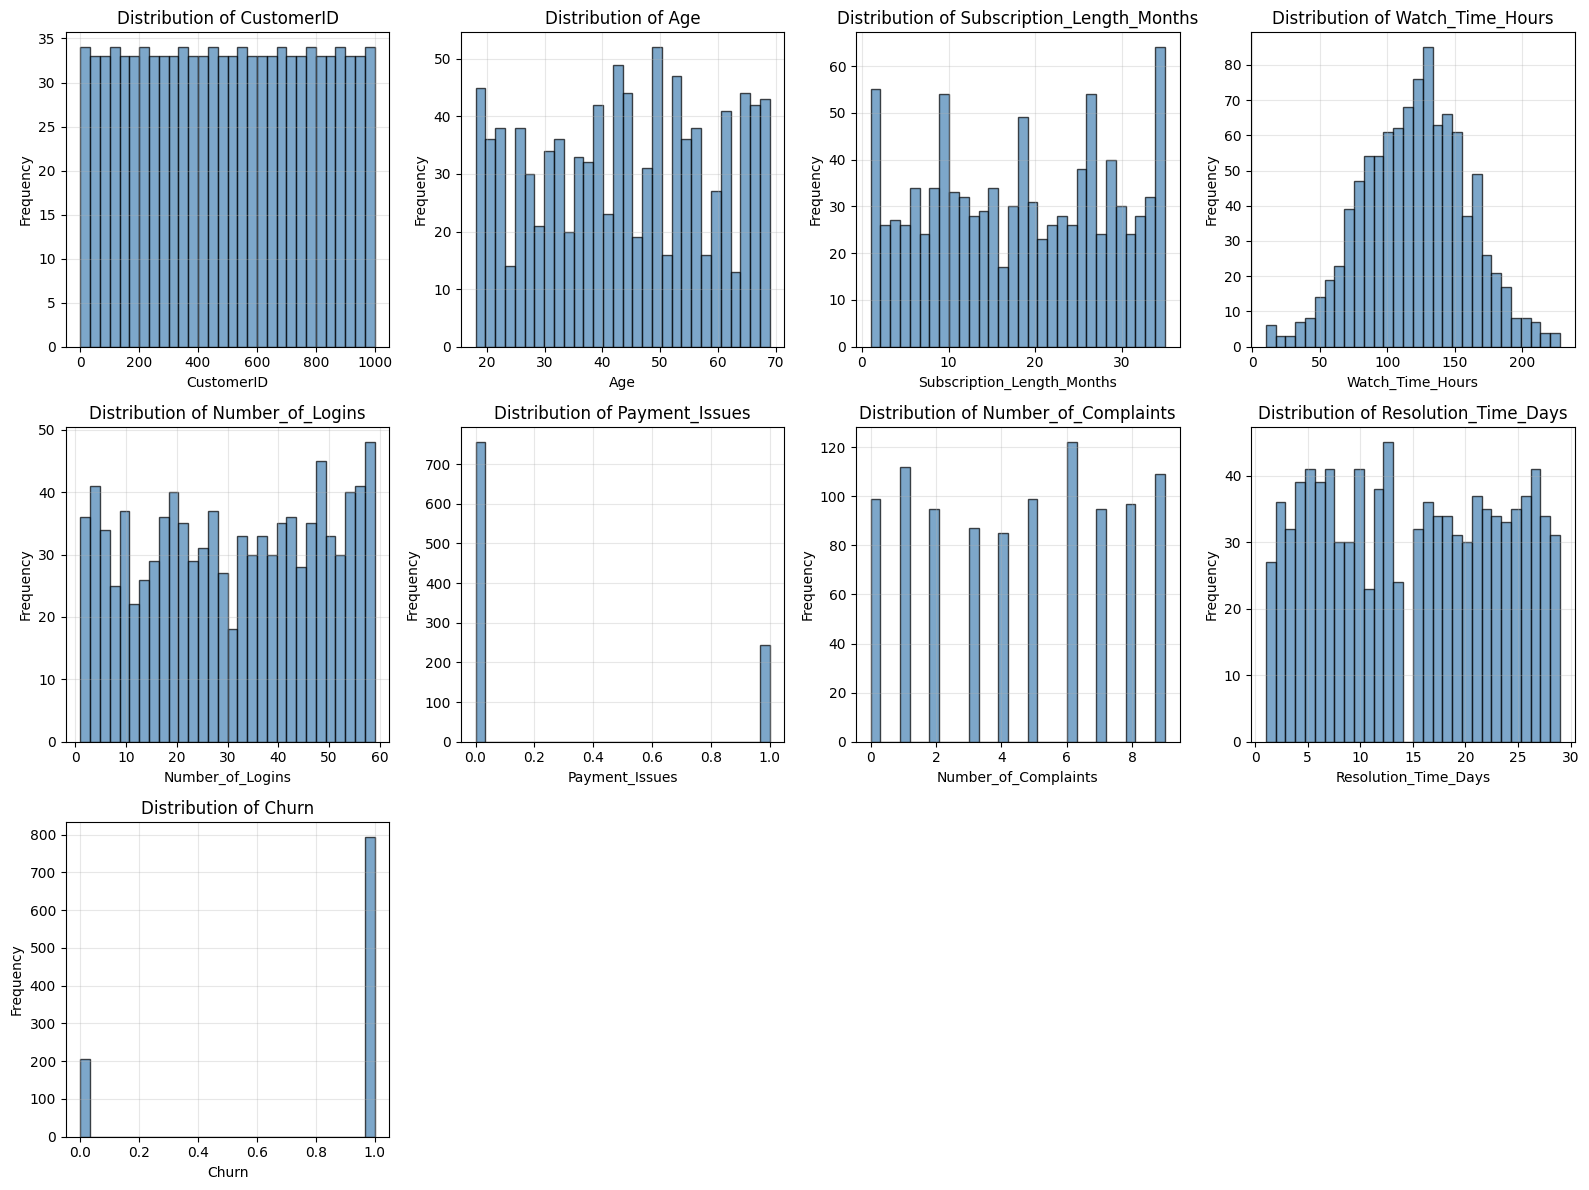

In [9]:
# Get numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

print(f"\nNumerical features ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

# 1. HISTOGRAMS - Distribution of numerical features
print("\n" + "-" * 50)
print("VISUALIZATION 1: HISTOGRAMS - Numerical Features Distribution")
print("-" * 50)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor="black", alpha=0.7, color="steelblue")
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis("off")

plt.tight_layout()
plt.show()


--------------------------------------------------
VISUALIZATION 2: BOX PLOTS - Numerical Features by Churn Status
--------------------------------------------------


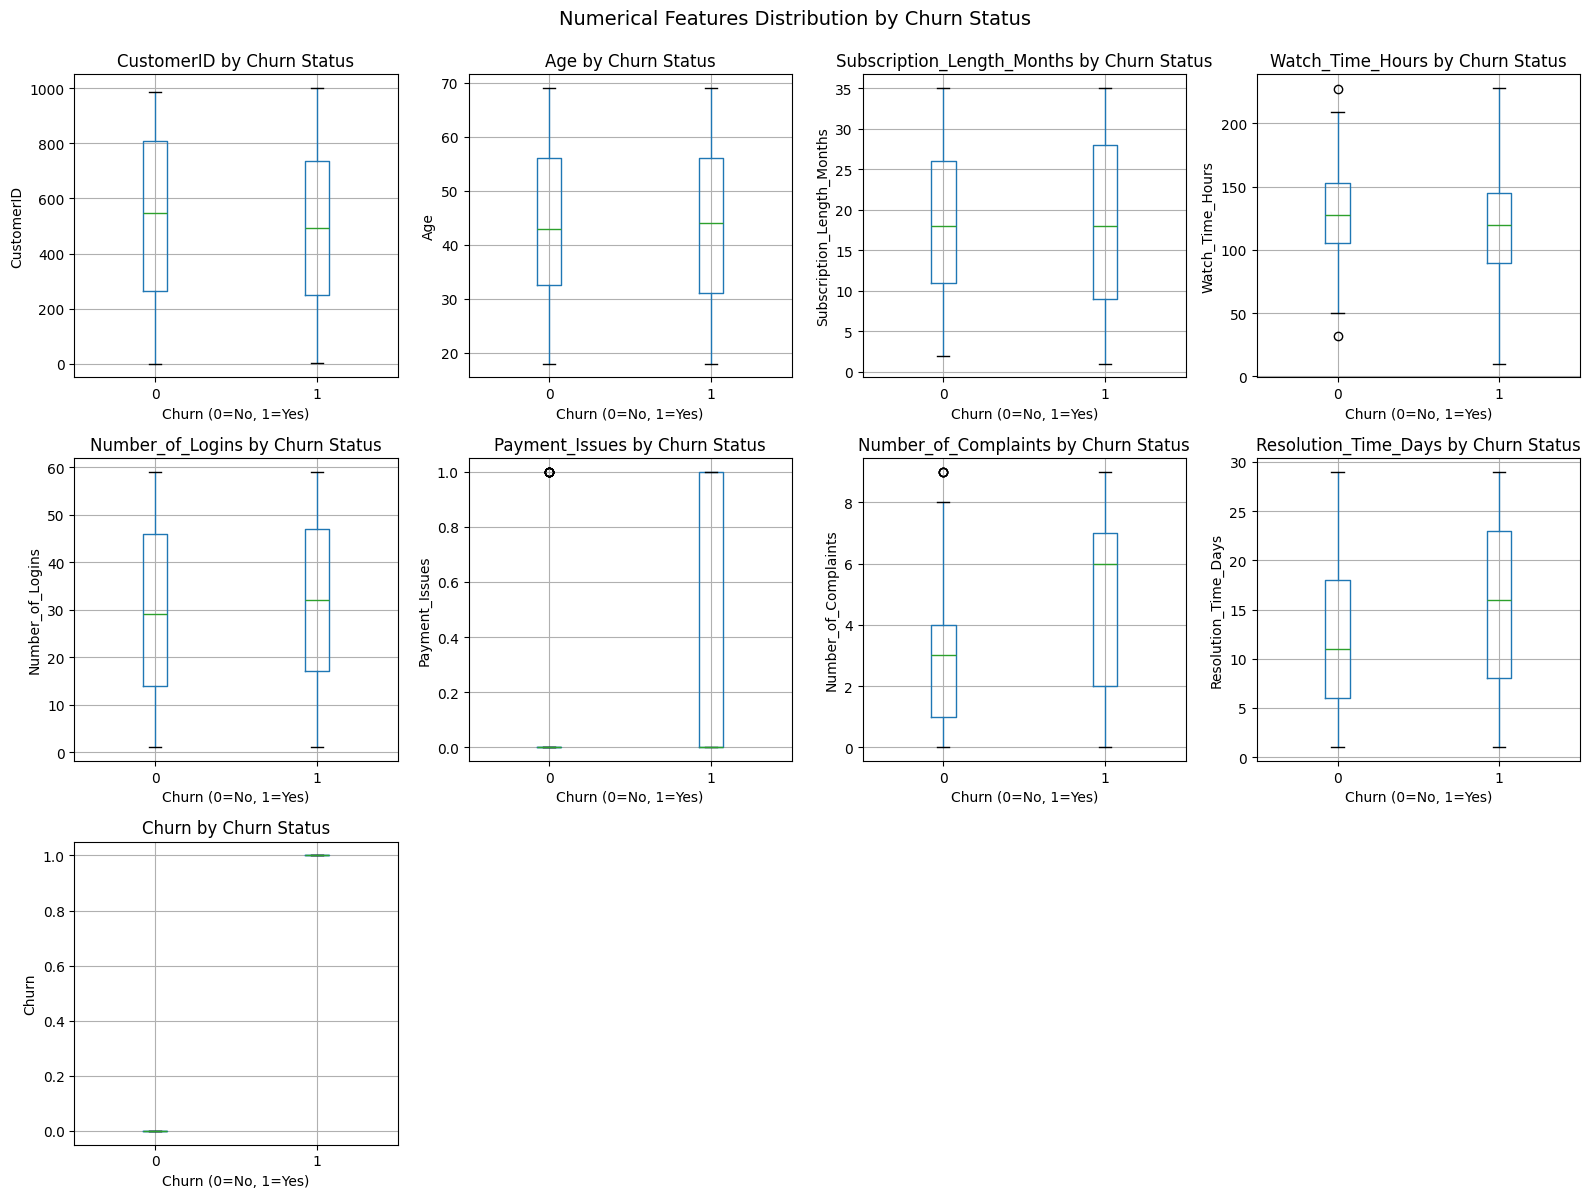

In [10]:
# 2. BOX PLOTS - Numerical features by Churn status
print("\n" + "-" * 50)
print("VISUALIZATION 2: BOX PLOTS - Numerical Features by Churn Status")
print("-" * 50)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by="Churn", ax=axes[idx])
    axes[idx].set_title(f"{col} by Churn Status")
    axes[idx].set_xlabel("Churn (0=No, 1=Yes)")
    axes[idx].set_ylabel(col)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis("off")

plt.suptitle("Numerical Features Distribution by Churn Status", fontsize=14, y=0.995)
plt.tight_layout()
plt.show()


--------------------------------------------------
CORRELATION ANALYSIS
--------------------------------------------------

Full Correlation Matrix:
                            CustomerID       Age  Subscription_Length_Months  \
CustomerID                    1.000000 -0.011816                   -0.006179   
Age                          -0.011816  1.000000                   -0.018938   
Subscription_Length_Months   -0.006179 -0.018938                    1.000000   
Watch_Time_Hours              0.034993 -0.020481                   -0.058968   
Number_of_Logins              0.028936  0.021817                    0.001856   
Payment_Issues               -0.042660  0.034503                    0.002649   
Number_of_Complaints          0.001616  0.040649                    0.042708   
Resolution_Time_Days          0.016077  0.004685                    0.032018   
Churn                        -0.038351 -0.010949                   -0.018409   

                            Watch_Time_Hours  Num

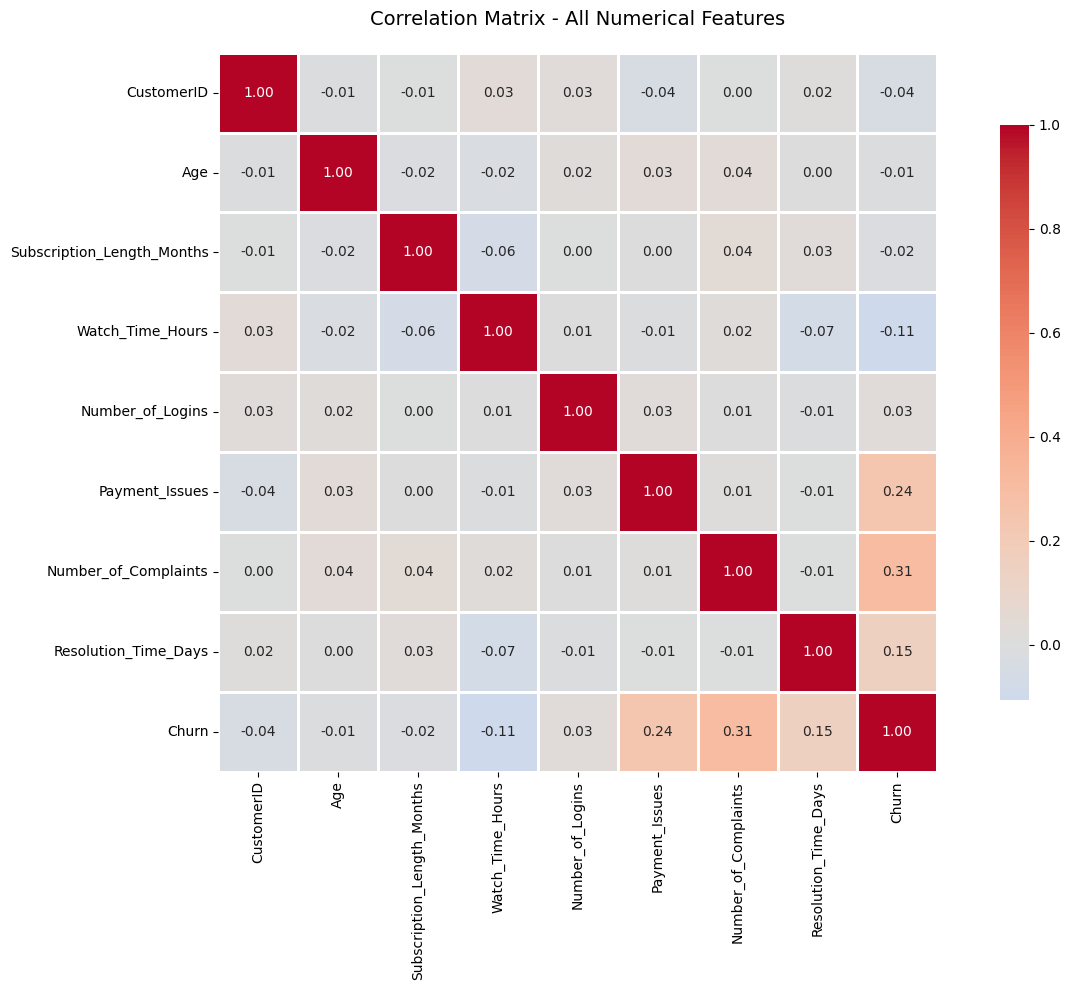

In [11]:
# 3. CORRELATION ANALYSIS
print("\n" + "-" * 50)
print("CORRELATION ANALYSIS")
print("-" * 50)

correlation_matrix = df[numerical_cols].corr()
print("\nFull Correlation Matrix:")
print(correlation_matrix)

print("\n\nCorrelation with Churn (sorted by absolute value):")
churn_corr = correlation_matrix["Churn"].sort_values(ascending=False)
print(churn_corr)

# Correlation heatmap
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=ax,
)
plt.title("Correlation Matrix - All Numerical Features", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

## Task 1.5: Important Patterns and Anomalies

In [12]:
print("\n" + "-" * 50)
print("KEY FINDINGS - PATTERNS & ANOMALIES")
print("-" * 50)

# Churn rate analysis
churn_rate = (df["Churn"].sum() / len(df)) * 100
print("\n1. TARGET VARIABLE (Churn):")
print(f"   • Churn Rate: {churn_rate:.2f}%")
print("   • Note: The dataset is highly imbalanced toward churned customers.")

# Correlation patterns
print("\n2. STRONG CORRELATIONS WITH CHURN:")
strong_corr = churn_corr[(churn_corr.abs() > 0.5) & (churn_corr.index != "Churn")]
if len(strong_corr) > 0:
    for feature, corr_val in strong_corr.items():
        direction = "positive" if corr_val > 0 else "negative"
        print(f"   • {feature}: {corr_val:.3f} ({direction} correlation)")
else:
    print("   • No strong single-feature correlations (|r| > 0.5)")
    top_features = churn_corr.drop("Churn").abs().nlargest(3)
    print("   • Top 3 features by correlation magnitude:")
    for feature, corr_val in top_features.items():
        print(f"     - {feature}: {churn_corr[feature]:.3f}")

# Customer demographics
print("\n3. CUSTOMER DEMOGRAPHICS:")
print(f"   • Age Range: {df['Age'].min()} - {df['Age'].max()} years (Mean: {df['Age'].mean():.1f})")
print(
    f"   • Subscription Length: {df['Subscription_Length_Months'].min()} - {df['Subscription_Length_Months'].max()} months"
)
print(
    f"   • Watch Time: {df['Watch_Time_Hours'].min():.2f} - {df['Watch_Time_Hours'].max():.2f} hours"
)

# Anomalies and outliers
print("\n4. POTENTIAL ANOMALIES:")
print(f"   • Low Watch Time: {(df['Watch_Time_Hours'] < 10).sum()} customers")
print(f"   • High Number of Complaints: {(df['Number_of_Complaints'] >= 7).sum()} customers")
print(f"   • High Resolution Time: {(df['Resolution_Time_Days'] > 25).sum()} customers")
print(f"   • Payment Issues: {(df['Payment_Issues'] == 1).sum()} customers with issues")

# Data quality measurements
print("\n5. DATA QUALITY:")
print("   ✓ Complete dataset: No missing values")
print(f"   ✓ Total records: {len(df)}")
print("   ✓ All columns have appropriate data types")
print("   ✓ Ready for preprocessing and modeling")


--------------------------------------------------
KEY FINDINGS - PATTERNS & ANOMALIES
--------------------------------------------------

1. TARGET VARIABLE (Churn):
   • Churn Rate: 79.30%
   • Note: The dataset is highly imbalanced toward churned customers.

2. STRONG CORRELATIONS WITH CHURN:
   • No strong single-feature correlations (|r| > 0.5)
   • Top 3 features by correlation magnitude:
     - Number_of_Complaints: 0.311
     - Payment_Issues: 0.239
     - Resolution_Time_Days: 0.151

3. CUSTOMER DEMOGRAPHICS:
   • Age Range: 18 - 69 years (Mean: 43.8)
   • Subscription Length: 1 - 35 months
   • Watch Time: 10.00 - 227.99 hours

4. POTENTIAL ANOMALIES:
   • Low Watch Time: 0 customers
   • High Number of Complaints: 301 customers
   • High Resolution Time: 143 customers
   • Payment Issues: 245 customers with issues

5. DATA QUALITY:
   ✓ Complete dataset: No missing values
   ✓ Total records: 1000
   ✓ All columns have appropriate data types
   ✓ Ready for preprocessing and 